In [1]:
import pandas as pd
import numpy as np
from itertools import cycle

from sklearn import metrics

from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('car_breakdown_prediction-develop/train_2.csv')
test = pd.read_csv('car_breakdown_prediction-develop/test_2.csv')

In [9]:
# loading training and testing labels
y_train = train['label']
y_test = test['label']

In [6]:
# original features
features_orig = ['ecoMode','cityMode','sportMode','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_extr = ['ecoMode','cityMode','sportMode', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20',
                 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14'
                 , 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 
                 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

In [11]:
# one_hot encoding 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [13]:
# scaling the features
X_train = train[features_extr]

X_test = test[features_extr] 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# random_forest
clf_rfcb = RandomForestClassifier(random_state=123,oob_score=True)
gs_params = {'max_depth': [5,8], 'criterion': ['entropy'],'n_estimators' : [50,100],'min_samples_split' : [0.1,0.05],'min_samples_leaf':[0.1,0.05],'max_features':['auto','log2']}
gs_score = 'roc_auc'

grid_search = model_selection.GridSearchCV(estimator=clf_rfcb, verbose = 1,param_grid=gs_params, cv=5, scoring=gs_score, n_jobs=-1,return_train_score = True)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=123,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'cr

In [356]:
grid_search.cv_results_

{'mean_fit_time': array([4.49574795, 5.38898616, 2.36405845, 4.63463368, 3.46503668,
        7.6662014 , 4.08915901, 9.08169813, 2.66689186, 5.63868203,
        2.88337164, 5.5392705 , 4.06505556, 7.82229519, 4.0464551 ,
        7.91019564, 2.99197392, 6.16925831, 3.0908236 , 6.08022265,
        4.64689751, 9.05175653, 4.59249854, 9.10054793, 2.66757669,
        5.57513976, 2.79667912, 5.60110855, 4.14952221, 8.00083432,
        4.04443083, 6.12391248]),
 'std_fit_time': array([0.15680073, 0.67848927, 0.06369142, 0.10646183, 0.09009075,
        0.16679091, 0.51962765, 0.13976654, 0.04208601, 0.16983074,
        0.04941067, 0.16238379, 0.08058212, 0.08481415, 0.06464074,
        0.15008687, 0.10788237, 0.16116523, 0.14433134, 0.13481398,
        0.11566113, 0.18796494, 0.13892175, 0.17406523, 0.05299776,
        0.12304294, 0.06028474, 0.07557779, 0.08233868, 0.25067329,
        0.08586107, 0.5329752 ]),
 'mean_score_time': array([0.09069257, 0.13534751, 0.08440652, 0.15713329, 0.077857

In [16]:
pd.DataFrame(grid_search.cv_results_).sort_values(['mean_test_score'],ascending = False)[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
23,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.863151,0.876085
21,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.863151,0.876085
5,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.863038,0.874739
7,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.863038,0.874739
22,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.862423,0.874710
20,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.862423,0.874710
4,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.862228,0.873453
6,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.862228,0.873453
30,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.860739,0.872942
28,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.860739,0.872942


<BarContainer object of 40 artists>

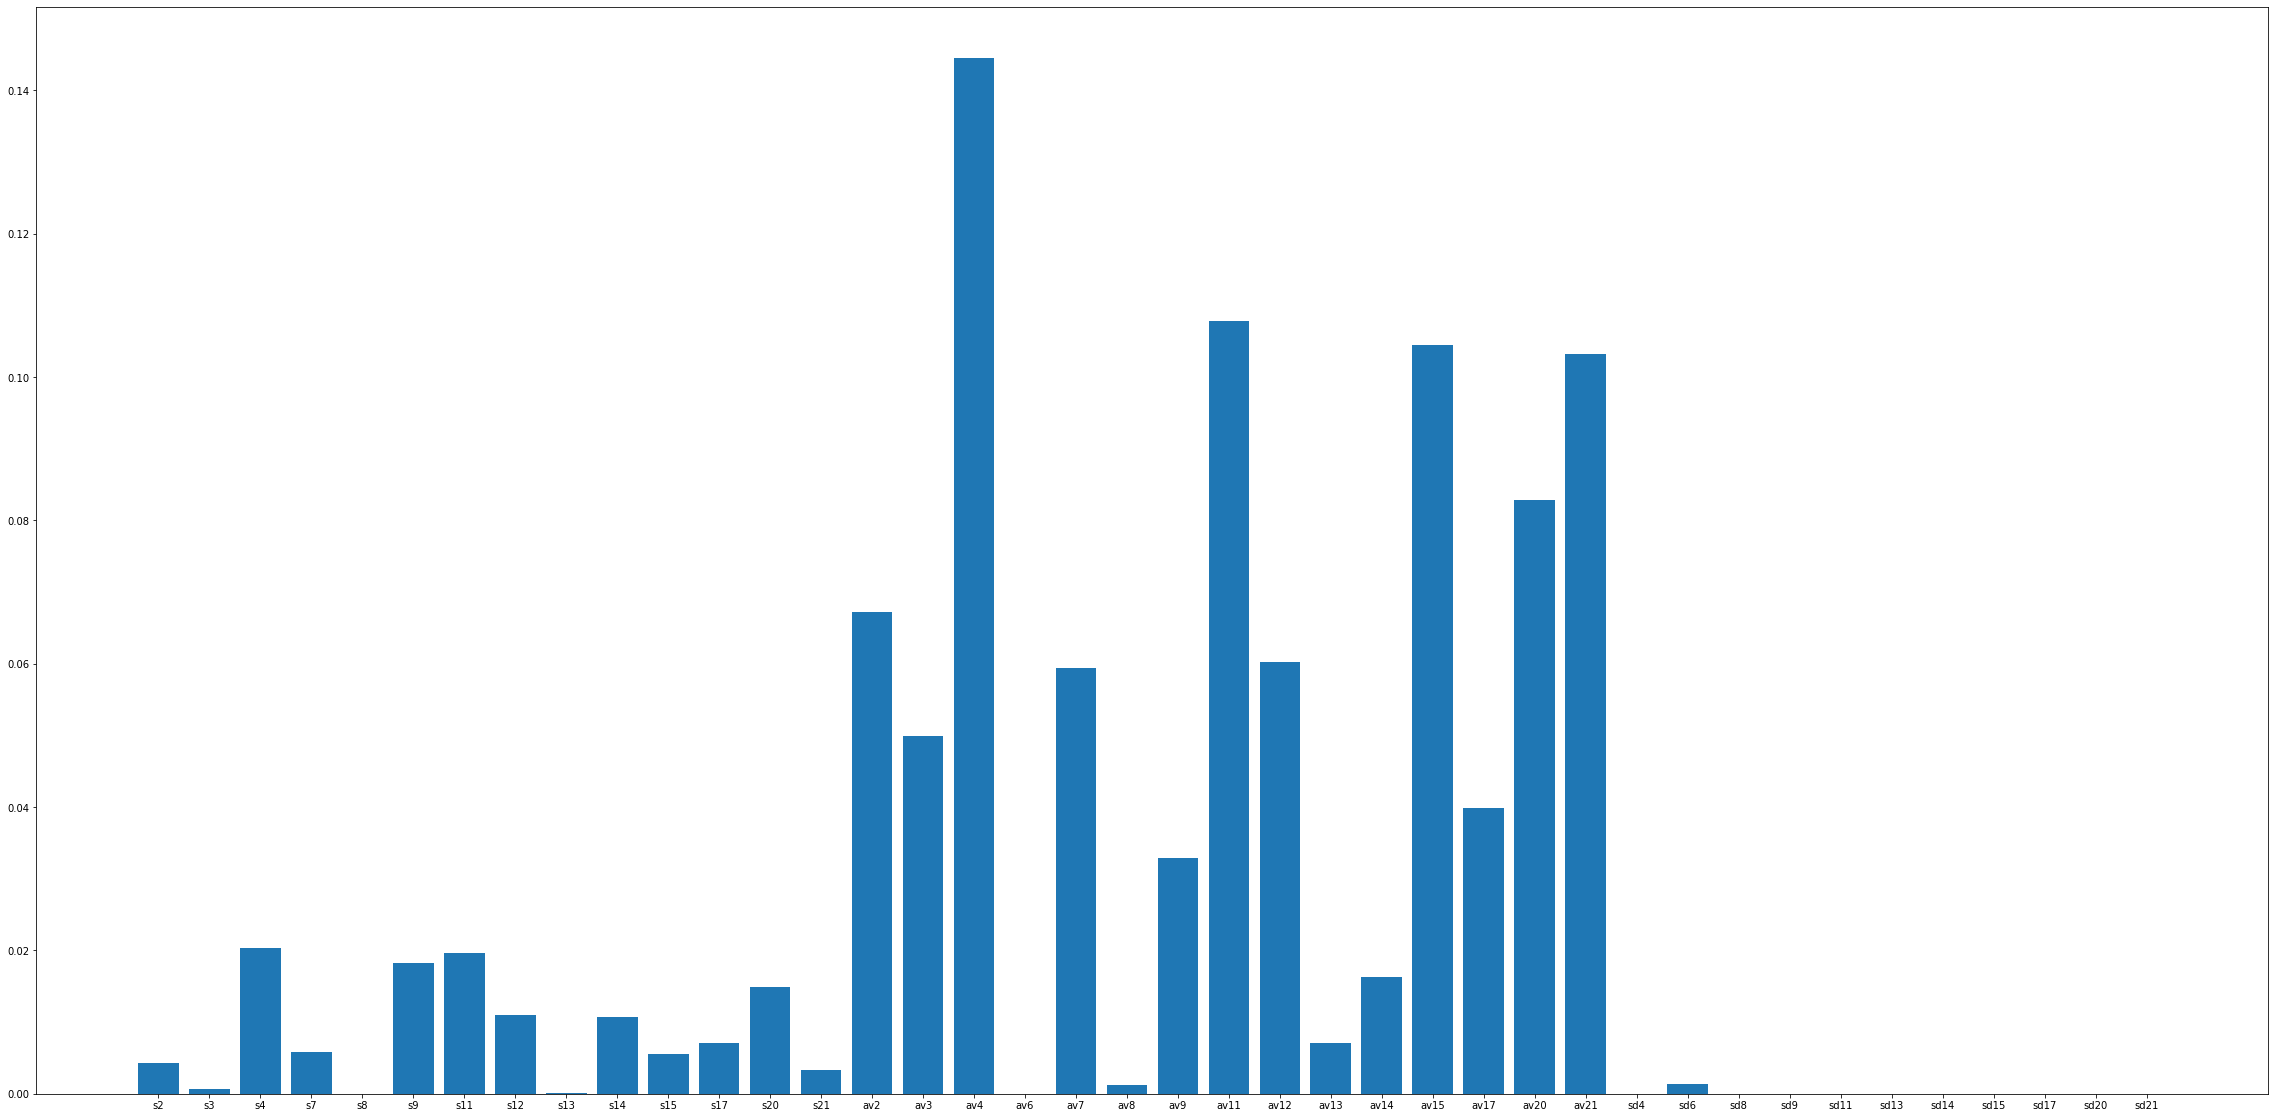

In [360]:
plt.figure(figsize=(40,20))
plt.bar(train.columns[2:],grid_search.best_estimator_.feature_importances_)

In [19]:
imp = dict()
imp_val = grid_search.best_estimator_.feature_importances_
for i,j in enumerate(features_extr):
    imp[j] = imp_val[i]

In [20]:
pd.DataFrame.from_dict(imp,orient ='index',columns = ['imp'])['imp'].sort_values(ascending = False)

av4        0.118125
av11       0.100896
av21       0.097751
av2        0.084945
av17       0.076271
             ...   
sd1        0.000000
av19       0.000000
av18       0.000000
av5        0.000000
ecoMode    0.000000
Name: imp, Length: 66, dtype: float64

In [366]:
features_drop = importance[importance['imp']<=0].index

In [363]:
train.drop(features_drop,axis = 1,inplace = True)importance = pd.DataFrame.from_dict(imp,orient ='index',columns = ['imp'])

In [23]:
# evaluation
y_pred = grid_search.predict(X_train)
y_score = grid_search.predict_proba(X_train)  
y_score = [y_score[i][:,[1]] for i in range(len(y_score))]
y_score = np.concatenate(y_score, axis=1)
multiclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_train, y_pred),
                        'macro F1' : metrics.f1_score(y_train, y_pred, average='macro'),
                        'micro F1' : metrics.f1_score(y_train, y_pred, average='micro'),
                        'macro Precision' : metrics.precision_score(y_train, y_pred,  average='macro'),
                        'micro Precision' : metrics.precision_score(y_train, y_pred,  average='micro'),
                        'macro Recall' : metrics.recall_score(y_train, y_pred,  average='macro'),
                        'micro Recall' : metrics.recall_score(y_train, y_pred,  average='micro'),
                        'macro ROC AUC' : metrics.roc_auc_score(y_train, y_score, average='macro'),
                        'micro ROC AUC' : metrics.roc_auc_score(y_train, y_score, average='micro')
                    }

/home/quantiphi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/quantiphi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
pd.DataFrame.from_dict(multiclass_metrics,orient='index')

,0
Accuracy,0.211139
macro F1,0.355159
micro F1,0.330388
macro Precision,0.469600
micro Precision,0.759150
macro Recall,0.302404
micro Recall,0.211139
macro ROC AUC,0.873578
micro ROC AUC,0.888291


In [25]:
y_train_orig = lb.inverse_transform(y_train)
y_pred_orig = lb.inverse_transform(y_pred)
metrics.confusion_matrix(y_train_orig, y_pred_orig)

array([[1451,   49,    0,    0,    0],
       [2075,  925,    0,    0,    0],
       [4289,  188,    0,    0,   23],
       [5030,    0,    0,    0,  901],
       [3494,    0,    0,    0, 2206]])

In [26]:
# evaluation
y_pred = grid_search.predict(X_test)
y_score = grid_search.predict_proba(X_test)  
y_score = [y_score[i][:,[1]] for i in range(len(y_score))]
y_score = np.concatenate(y_score, axis=1)
multiclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'macro F1' : metrics.f1_score(y_test, y_pred, average='macro'),
                        'micro F1' : metrics.f1_score(y_test, y_pred, average='micro'),
                        'macro Precision' : metrics.precision_score(y_test, y_pred,  average='macro'),
                        'micro Precision' : metrics.precision_score(y_test, y_pred,  average='micro'),
                        'macro Recall' : metrics.recall_score(y_test, y_pred,  average='macro'),
                        'micro Recall' : metrics.recall_score(y_test, y_pred,  average='micro'),
                        'macro ROC AUC' : metrics.roc_auc_score(y_test, y_score, average='macro'),
                        'micro ROC AUC' : metrics.roc_auc_score(y_test, y_score, average='micro')
                    }

/home/quantiphi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/quantiphi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/quantiphi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/quantiphi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
y_train_orig = lb.inverse_transform(y_train_o)
y_pred_orig = lb.inverse_transform(y_pred)
metrics.confusion_matrix(y_train_orig, y_pred_orig)

In [372]:
pd.DataFrame.from_dict(multiclass_metrics,orient='index')

,0
Accuracy,0.067272
macro F1,0.090482
micro F1,0.105979
macro Precision,0.377275
micro Precision,0.249575
macro Recall,0.125644
micro Recall,0.067272
macro ROC AUC,0.637396
micro ROC AUC,0.588483


In [195]:
y_train = y_train - 1

In [199]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train.iloc[:,0])
dtest = xgb.DMatrix(data=X_test)

params = {
    'max_depth': 8,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 4,
    'n_gpus': 0,
    'n_estimators':1000

}


bst = xgb.train(params, dtrain)

pred = bst.predict(dtest)

In [200]:
pred

array([3., 3., 3., ..., 0., 0., 0.], dtype=float32)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(['mean_test_score'],ascending = False)[['params','mean_test_score','mean_train_score']]

In [94]:
eval = ['params','mean_test_score','mean_train_score']
print('mean_train:{} mean_test:{} params:{}'.format(grid_search.cv_results_[eval[2]],grid_search.cv_results_[eval[1]],grid_search.cv_results_[eval[0]]))

mean_train:[0.8710669  0.88634342 0.93015626 0.96274508 0.87062781 0.88576517
 0.93032712 0.96236967] mean_test:[0.85799784 0.86481443 0.87293941 0.87381424 0.85805681 0.86522553
 0.87387049 0.87481148] params:[{'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'gini', 'max_depth': 8}, {'criterion': 'gini', 'max_depth': 10}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 8}, {'criterion': 'entropy', 'max_depth': 10}]
